In [1]:
import sys
from bs4 import BeautifulSoup
import urllib.request
import requests
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fname = fm.FontProperties(fname='malgun.ttf').get_name()
import sqlite3
from IPython.display import Image
mpl.rc('font',family=fname)
import matplotlib.gridspec as gridspec
from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

### finance-datareader를 활용해본다

### 설명: 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리
#### ref: https://financedata.github.io/posts/finance-data-reader-users-guide.html


#### 주식종목 찾기용
NASDAQ	나스닥 종목 \
NYSE	뉴욕 증권거래소 종목 \
AMEX	AMEX 종목 \
SP500	S&P 500 종목

#### 가격정보 및 지수 찾기용
DJI	다우존스 지수 \
IXIC	나스닥 지수 \
US500	S&P 500 지수 \
VIX	S&P 500 VIX \
JP225	닛케이 225 선물 \
STOXX50E	Euro Stoxx 50 \
CSI300	CSI 300 (중국) \
HSI	항셍 (홍콩) \
FTSE	영국 FTSE \
DAX	독일 DAX 30 \
CAC	프랑스 CAC 40

In [2]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.10'

In [3]:
df_nasdaq = fdr.StockListing('NASDAQ')
df_nasdaq.head()

100%|██████████| 3264/3264 [00:06<00:00, 529.53it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,FB,Facebook Inc Class A,소프트웨어 및 IT서비스,572010
4,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010


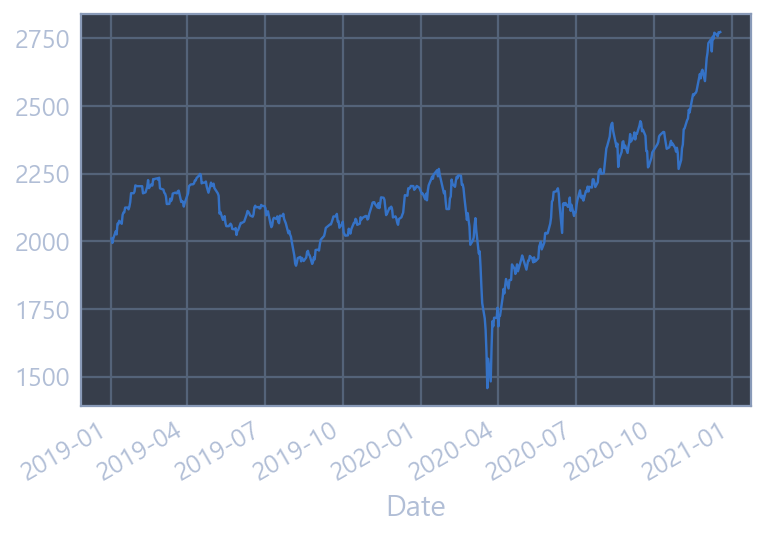

In [4]:
# KS11 (KOSPI 지수), 2015년~현재
df = fdr.DataReader('KS11', '2019')
df['Close'].plot()

In [5]:
# 나스닥 지수
df_nasdaq_num = fdr.DataReader('IXIC','2020')
df_nasdaq_num

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,9092.19,9039.46,9093.43,9010.89,6.549500e+08,0.0133
2020-01-03,9020.77,8976.43,9065.76,8976.43,6.185500e+08,-0.0079
2020-01-06,9071.47,8943.50,9072.41,8943.50,6.902300e+08,0.0056
2020-01-07,9068.58,9076.65,9091.93,9042.55,5.522300e+08,-0.0003
2020-01-08,9129.24,9068.03,9168.89,9059.38,5.958100e+08,0.0067
...,...,...,...,...,...,...
2020-12-11,12377.87,12336.79,12383.50,12246.77,8.761500e+08,-0.0023
2020-12-14,12440.04,12447.44,12543.00,12432.71,9.833100e+08,0.0050
2020-12-15,12595.06,12543.26,12596.13,12465.42,9.156200e+08,0.0125


In [6]:
df_nas = df_nasdaq_num.reset_index()

In [7]:
nas = df_nas.astype({'Date': str})

In [8]:
# 날짜 데이터 변경
new_date = []
for i in range(len(nas)):
    new_date.append(nas['Date'][i].replace('-',''))

In [9]:
#nas['new_date'] = new_date
nas

,Date,Close,Open,High,Low,Volume,Change
0,2020-01-02,9092.19,9039.46,9093.43,9010.89,6.549500e+08,0.0133
1,2020-01-03,9020.77,8976.43,9065.76,8976.43,6.185500e+08,-0.0079
2,2020-01-06,9071.47,8943.50,9072.41,8943.50,6.902300e+08,0.0056
3,2020-01-07,9068.58,9076.65,9091.93,9042.55,5.522300e+08,-0.0003
4,2020-01-08,9129.24,9068.03,9168.89,9059.38,5.958100e+08,0.0067
...,...,...,...,...,...,...,...
239,2020-12-11,12377.87,12336.79,12383.50,12246.77,8.761500e+08,-0.0023
240,2020-12-14,12440.04,12447.44,12543.00,12432.71,9.833100e+08,0.0050
241,2020-12-15,12595.06,12543.26,12596.13,12465.42,9.156200e+08,0.0125
242,2020-12-16,12658.19,12611.04,12687.32,12566.38,9.858200e+08,0.0050


In [10]:
# 칼럼 재배치

cols = nas.columns.tolist()
cols

['Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'Change']

In [11]:
cols = cols[-1:]+cols[:-1]

In [12]:
nas = nas[cols]

In [13]:
nas.drop(['Date'],axis='columns',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
nas

,Change,Close,Open,High,Low,Volume
0,0.0133,9092.19,9039.46,9093.43,9010.89,6.549500e+08
1,-0.0079,9020.77,8976.43,9065.76,8976.43,6.185500e+08
2,0.0056,9071.47,8943.50,9072.41,8943.50,6.902300e+08
3,-0.0003,9068.58,9076.65,9091.93,9042.55,5.522300e+08
4,0.0067,9129.24,9068.03,9168.89,9059.38,5.958100e+08
...,...,...,...,...,...,...
239,-0.0023,12377.87,12336.79,12383.50,12246.77,8.761500e+08
240,0.0050,12440.04,12447.44,12543.00,12432.71,9.833100e+08
241,0.0125,12595.06,12543.26,12596.13,12465.42,9.156200e+08
242,0.0050,12658.19,12611.04,12687.32,12566.38,9.858200e+08


In [15]:
nas.to_csv('.../NASDAQ.csv',index=False)

In [16]:
# 다우존스

df_dow = fdr.DataReader('DJI','2020')

In [17]:
df_dow_1 = df_dow.reset_index()

In [18]:
dow = df_dow_1.astype({'Date': str})

In [19]:
new_date = []
for i in range(len(nas)):
    new_date.append(dow['Date'][i].replace('-',''))

In [20]:
dow['new_date'] = new_date

In [21]:
cols = dow.columns.tolist()
cols

['Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'Change', 'new_date']

In [22]:
cols = cols[-1:]+cols[:-1]

In [23]:
dow = dow[cols]

In [24]:
dow.drop(['Date'],axis='columns',inplace=True)

In [25]:
dow.to_csv('.../DOW.csv',index=False)

In [26]:
# S&P500

df_sp = fdr.DataReader('US500','2020')

In [27]:
df_sp_1 = df_sp.reset_index()

In [28]:
sp = df_sp_1.astype({'Date': str})

In [29]:
new_date = []
for i in range(len(nas)):
    new_date.append(sp['Date'][i].replace('-',''))

In [30]:
sp['new_date'] = new_date

In [31]:
cols = sp.columns.tolist()
cols

['Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'Change', 'new_date']

In [32]:
cols = cols[-1:]+cols[:-1]

In [33]:
sp = sp[cols]

In [34]:
sp.drop(['Date'],axis='columns',inplace=True)

In [35]:
sp.to_csv('.../S&P500.csv',index=False)

In [36]:
# 닛케이

df_nit = fdr.DataReader('JP225','2020')

In [37]:
df_nit_1 = df_nit.reset_index()

In [38]:
nit = df_nit_1.astype({'Date': str})

In [39]:
new_date = []
for i in range(len(nit)):
    new_date.append(nit['Date'][i].replace('-',''))

In [40]:
nit['new_date'] = new_date

In [41]:
nit = nit[cols]

In [42]:
nit.drop(['Date'],axis='columns',inplace=True)

In [43]:
nit.to_csv('.../닛케이225선물.csv',index=False)

In [44]:
# CSI 300

df_csi = fdr.DataReader('CSI300','2020')

In [45]:
df_csi_1 = df_csi.reset_index()

In [46]:
csi = df_csi_1.astype({'Date': str})

In [47]:
new_date = []
for i in range(len(csi)):
    new_date.append(csi['Date'][i].replace('-',''))

In [48]:
csi['new_date'] = new_date

In [49]:
csi = csi[cols]

In [50]:
csi.drop(['Date'],axis='columns',inplace=True)

In [51]:
csi.to_csv('.../CSI300.csv',index=False)

In [52]:
# 홍콩 항셍

df_hsi = fdr.DataReader('HSI','2020')

In [53]:
df_hsi_1 = df_hsi.reset_index()

In [54]:
hsi = df_hsi_1.astype({'Date': str})

In [55]:
new_date = []
for i in range(len(hsi)):
    new_date.append(hsi['Date'][i].replace('-',''))

In [56]:
hsi['new_date'] = new_date

In [57]:
hsi = hsi[cols]

In [58]:
hsi.drop(['Date'],axis='columns',inplace=True)

In [59]:
hsi.to_csv('.../HSI.csv',index=False)